In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer 

Exploring data

In [2]:
names = pd.read_csv('drive/MyDrive/defiIA/categories_string.csv')['0'].to_dict()
jobs = pd.read_csv('drive/MyDrive/defiIA/train_label.csv', index_col='Id')['Category']
jobs = jobs.map(names)
jobs = jobs.rename('job')
jobs

Id
0            professor
1           accountant
2            professor
3            architect
4            architect
              ...     
217192       professor
217193    psychologist
217194       professor
217195       professor
217196           model
Name: job, Length: 217197, dtype: object

In [3]:
genders = pd.read_json('drive/MyDrive/defiIA/train.json').set_index('Id')['gender']
genders.head()

Id
0    F
1    M
2    M
3    M
4    M
Name: gender, dtype: object

In [4]:
train_df = pd.read_json("drive/MyDrive/defiIA/train.json")
train_df

,Id,description,gender
0,0,She is also a Ronald D. Asmus Policy Entrepre...,F
1,1,He is a member of the AICPA and WICPA. Brent ...,M
2,2,Dr. Aster has held teaching and research posi...,M
4,3,He runs a boutique design studio attending cl...,M
5,4,"He focuses on cloud security, identity and ac...",M
...,...,...,...
271492,217192,A member of the UWA Cultural Collections Boar...,M
271493,217193,Kelly has worked globally leading teams of co...,F
271494,217194,He's the lead author of a recent study that f...,M
271495,217195,She specializes in the theoretical and pedago...,F


In [5]:
test_df = pd.read_json("drive/MyDrive/defiIA/test.json")
test_df.head()

,Id,description,gender
3,0,She currently works on CNN’s newest primetime...,F
6,1,Lavalette’s photographs have been shown widel...,M
11,2,Along with his academic and professional deve...,M
17,3,She obtained her Ph.D. in Islamic Studies at ...,F
18,4,She studies issues of women and Islam and has...,F


In [6]:
people = pd.concat((jobs, genders), axis='columns')
#people.head()

In [7]:
#counts = people.groupby(['job', 'gender']).size().unstack('gender')
#counts

In [8]:
category = pd.read_csv('drive/MyDrive/defiIA/categories_string.csv')

In [9]:
train_df.head()

,Id,description,gender
0,0,She is also a Ronald D. Asmus Policy Entrepre...,F
1,1,He is a member of the AICPA and WICPA. Brent ...,M
2,2,Dr. Aster has held teaching and research posi...,M
4,3,He runs a boutique design studio attending cl...,M
5,4,"He focuses on cloud security, identity and ac...",M


Cleaning data

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    text = text.lower()
    text = re.sub(REPLACE_BY_SPACE_RE, " ", text)# replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(BAD_SYMBOLS_RE,'',text)# delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([w for w in text.split() if not w in STOPWORDS]) # delete stopwords from text
    return text

In [12]:
X_train = [text_prepare(x) for x in train_df.description]

In [13]:
X_train[:2]

['also ronald asmus policy entrepreneur fellow german marshall fund visiting fellow centre international studies cis university oxford commentary first appeared sada online journal published carnegie endowment international peace',
 'member aicpa wicpa brent graduated university wisconsin la crosse degree accountancy lived southern wisconsin entire life currently resides pardeeville wife sara three children brent sara great appreciation music art theater']

In [14]:
y_train_final = pd.DataFrame({'job_description': X_train, 'tags': y_train['Category']})
#X_train
y_train_final

NameError: ignored

In [ ]:
#X_test = pd.DataFrame({'job_description': X_test})
#X_test

In [15]:
y_train = pd.read_csv("drive/MyDrive/defiIA/train_label.csv")
y_train

,Id,Category
0,0,19
1,1,9
2,2,19
3,3,24
4,4,24
...,...,...
217192,217192,19
217193,217193,22
217194,217194,19
217195,217195,19


In [16]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words 
MAX_SEQUENCE_LENGTH = 130
# This is fixed.
EMBEDDING_DIM = 128
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 286210 unique tokens.


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(X_train)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (217197, 130)


In [18]:
train_label = pd.read_csv("drive/MyDrive/defiIA/train_label.csv")

In [19]:
train_label.head()

,Id,Category
0,0,19
1,1,9
2,2,19
3,3,24
4,4,24


In [20]:
Y_train = pd.get_dummies(y_train['Category']).values
print('Shape of label tensor:', Y_train.shape)

Shape of label tensor: (217197, 28)


In [22]:
!pip3 install ktrain
# import ktrain and the ktrain.text modules

import ktrain
from ktrain import text

     |████████████████████████████████| 25.3MB 1.3MB/s 
     |████████████████████████████████| 983kB 42.0MB/s 
     |████████████████████████████████| 266kB 47.8MB/s 
     |████████████████████████████████| 1.3MB 40.2MB/s 
     |████████████████████████████████| 1.1MB 43.2MB/s 
     |████████████████████████████████| 471kB 42.4MB/s 
     |████████████████████████████████| 2.9MB 44.8MB/s 
     |████████████████████████████████| 890kB 37.3MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.2-cp36-none-any.whl size=25276306 sha256=890053918f5aac4f2f765d090c0bbb4b356b24e73292623e13838b93d3d36e6e
  Stored in directory: /root/.cache/pip/wheels/fe/56/00/25444c352cc843e5c5daea0e9517a192878ae22c2c6b5f4573
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=7b07277c58f94b190d766fb69844dfffb706e78a2e1244019cb296b20cf6031a
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
  Created wheel for syn

In [23]:
 pd.read_csv("drive/MyDrive/defiIA/train.csv").head()

,job_description,tags
0,also ronald asmus policy entrepreneur fellow g...,19
1,member aicpa wicpa brent graduated university ...,9
2,dr aster held teaching research positions ben ...,19
3,runs boutique design studio attending clients ...,24
4,focuses cloud security identity access managem...,24


In [24]:
df = pd.read_csv("drive/MyDrive/defiIA/train.csv")

In [25]:
x, y = df['job_description'].values, df['tags'].values

In [26]:
classes = list(set(y))
classes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27]

In [27]:
t = text.Transformer('bert-base-uncased', maxlen=150, classes=classes)

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:414: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


In [28]:
trn = t.preprocess_train(x, y)
model = t.get_classifier()

preprocessing train...
language: en
train sequence lengths:
	mean : 38
	95percentile : 72
	99percentile : 83


Is Multi-Label? False


In [29]:
learner = ktrain.get_learner(model, train_data=trn, batch_size=16)

In [ ]:
learner.lr_find(max_epochs=5)

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
  197/13574 [..............................] - ETA: 91:36:42 - loss: 3.2629 - accuracy: 0.1110

In [75]:
DATA_PATH = "drive/MyDrive/defiIA/train.csv"
NUM_WORDS = 50000
MAXLEN = 150
trn, val, preproc = text.texts_from_csv(DATA_PATH,
                     'job_description',
                      label_columns = ['tags'],
                      val_filepath=None, # if None, 10% of data will be used for validation
                      max_features=NUM_WORDS, maxlen=MAXLEN,
                      ngram_range=1)

detected encoding: utf-8 (if wrong, set manually)
language: en
Word Counts: 267280
Nrows: 195477
195477 train sequences
train sequence lengths:
	mean : 36
	95percentile : 69
	99percentile : 80
x_train shape: (195477,150)
y_train shape: (195477, 28)
Is Multi-Label? False
21720 test sequences
test sequence lengths:
	mean : 36
	95percentile : 69
	99percentile : 80
x_test shape: (21720,150)
y_test shape: (21720, 28)


In [64]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [65]:
model = text.text_classifier('fasttext', trn, preproc=preproc)
learner = ktrain.get_learner(model, train_data=trn, val_data=val)

Is Multi-Label? False
compiling word ID features...
maxlen is 150
done.


In [67]:
learner.lr_find(max_epochs=5)

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
6109/6109 [==============================] - 237s 39ms/step - loss: 3.9552 - accuracy: 0.0324
Epoch 2/5
6109/6109 [==============================] - 238s 39ms/step - loss: 3.2223 - accuracy: 0.1480
Epoch 3/5
6109/6109 [==============================] - 235s 38ms/step - loss: 1.6548 - accuracy: 0.5493
Epoch 4/5
6109/6109 [==============================] - 234s 38ms/step - loss: 2.0746 - accuracy: 0.4515
Epoch 5/5
6109/6109 [==============================] - 235s 38ms/step - loss: 3.1645 - accuracy: 0.2868


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


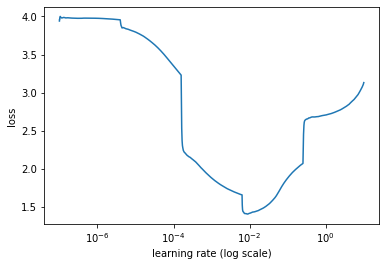

In [68]:
learner.lr_plot()

In [69]:
learner.autofit(0.01, 10)



begin training using triangular learning rate policy with max lr of 0.0007...
Epoch 1/8
6109/6109 [==============================] - 239s 39ms/step - loss: 1.9293 - accuracy: 0.4790 - val_loss: 1.0459 - val_accuracy: 0.7151
Epoch 2/8
6109/6109 [==============================] - 237s 39ms/step - loss: 1.2939 - accuracy: 0.6395 - val_loss: 0.8916 - val_accuracy: 0.7490
Epoch 3/8
6109/6109 [==============================] - 236s 39ms/step - loss: 1.1631 - accuracy: 0.6745 - val_loss: 0.8363 - val_accuracy: 0.7586
Epoch 4/8
6109/6109 [==============================] - 236s 39ms/step - loss: 1.0824 - accuracy: 0.6962 - val_loss: 0.8060 - val_accuracy: 0.7691
Epoch 5/8
6109/6109 [==============================] - 237s 39ms/step - loss: 1.0317 - accuracy: 0.7100 - val_loss: 0.7851 - val_accuracy: 0.7738
Epoch 6/8
6109/6109 [==============================] - 237s 39ms/step - loss: 0.9875 - accuracy: 0.7205 - val_loss: 0.7723 - val_accuracy: 0.7762
Epoch 7/8
6109/6109 [=======================

Let's compute for ROC-AUC of our final model for identifying toxic online behavior:

In [104]:
x_test = ["aa"]

In [105]:
from sklearn.metrics import roc_auc_score
y_pred = learner.model.predict(x_test, verbose=0)
score = roc_auc_score(y_test, y_pred)
print("\n ROC-AUC score: %.6f \n" % (score))

UnimplementedError: ignored

Let's Making predictions

In [77]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
test = test_df['description'].to_list()
test

In [96]:
pred = predictor.predict(test)

In [99]:
pred[:2]

['tags_19', 'tags_19']

In [91]:
test_df["Category"] = pred
baseline_file = test_df[["Id","Category"]]
baseline_file.to_csv("drive/MyDrive/defiIA/baseline.csv", index=False)